In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import os;
os.listdir('/kaggle/input/')

['customer-segmentation-tutorial-in-python']

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


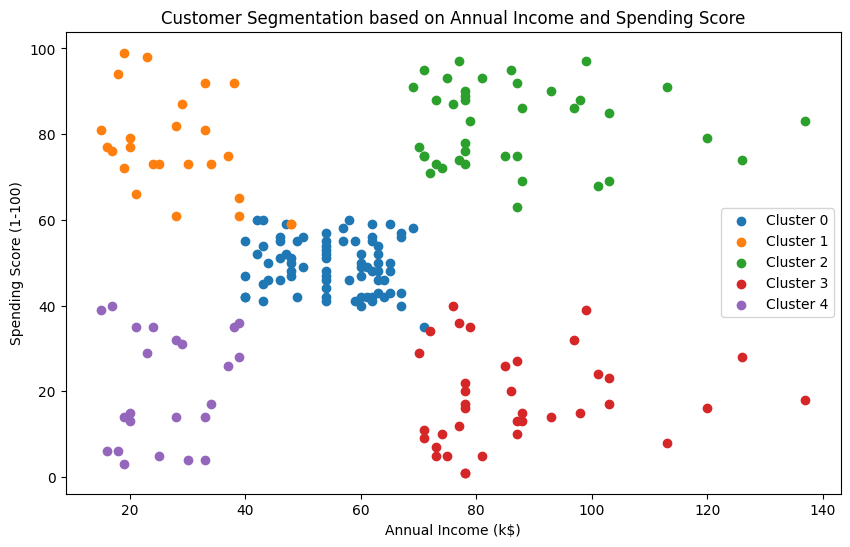

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Select features for clustering (Age, Annual Income, Spending Score)
X = data.iloc[:, [2, 3, 4]].values

# Choose the number of clusters (you can adjust this based on your requirements)
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get the cluster labels assigned to each customer
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {i}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.legend()
plt.show()